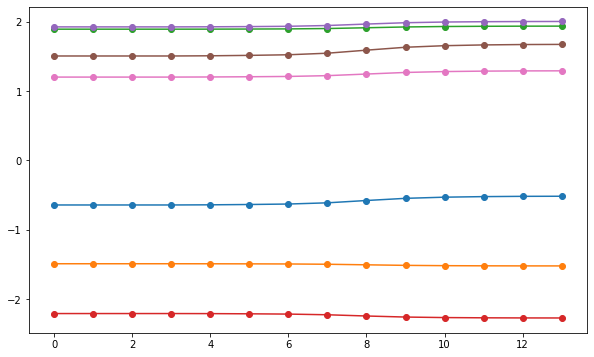

In [19]:
import numpy as np
import toppra as ta
import toppra.algorithm as algo
from toppra import constraint
import matplotlib.pyplot as plt

waypts = np.array([[-0.64142144, -1.48907971,  1.894104  , -2.2074306 ,  1.92707002,
         1.50737071,  1.20313358],
       [-0.64145738, -1.48909926,  1.89408648, -2.20745182,  1.92706716,
         1.50738573,  1.20313358],
       [-0.64145738, -1.48909926,  1.89408648, -2.20745182,  1.92706716,
         1.50738573,  1.20313358],
       [-0.64142966, -1.48908424,  1.89409995, -2.20743537,  1.92706931,
         1.50737417,  1.20313358],
       [-0.63920563, -1.48959816,  1.89454412, -2.2084074 ,  1.9284476 ,
         1.51026404,  1.20470095],
       [-0.63463145, -1.49070168,  1.89595389, -2.21121669,  1.93131077,
         1.51618505,  1.2078774 ],
       [-0.6278106 , -1.49234819,  1.89800382, -2.2152307 ,  1.93571103,
         1.52499902,  1.21233833],
       [-0.61042947, -1.49643397,  1.90333021, -2.22506738,  1.94692171,
         1.54750407,  1.22376776],
       [-0.57696438, -1.50457776,  1.91456592, -2.24278426,  1.96783555,
         1.59136438,  1.24697554],
       [-0.54576355, -1.51244676,  1.92596698, -2.25792789,  1.98712289,
         1.63321686,  1.26982975],
       [-0.52902359, -1.51683176,  1.93251836, -2.26542211,  1.99711704,
         1.65592957,  1.28268933],
       [-0.52094024, -1.51897228,  1.93576336, -2.26886582,  2.00186777,
         1.66694438,  1.28901827],
       [-0.51691443, -1.52007115,  1.9374156 , -2.27054   ,  2.0042026 ,
         1.67247248,  1.29224515],
       [-0.51555175, -1.5204109 ,  1.93802011, -2.27124834,  2.00526309,
         1.67445993,  1.29325616]])
vlim = np.array([[-2.175,  2.175],
       [-2.175,  2.175],
       [-2.175,  2.175],
       [-2.175,  2.175],
       [-2.61 ,  2.61 ],
       [-2.61 ,  2.61 ],
       [-2.61 ,  2.61 ]])
alim = np.array([[-15. ,  15. ],
       [ -7.5,   7.5],
       [-10. ,  10. ],
       [-12.5,  12.5],
       [-15. ,  15. ],
       [-20. ,  20. ],
       [-20. ,  20. ]])
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(waypts, 'o-')

In [20]:
path = ta.SplineInterpolator(np.linspace(0, 0.15, waypts.shape[0]), waypts)
pc_vel = constraint.JointVelocityConstraint(vlim)
pc_acc = constraint.JointAccelerationConstraint(alim)
instance = algo.TOPPRA([pc_vel, pc_acc], path, solver_wrapper="seidel")
jnt_traj = instance.compute_trajectory(0, 0)

In [21]:
deriv = jnt_traj.evaldd(cs.x)
i, j = np.where(~((alim[:, 0] < deriv) & (deriv < alim[:, 1])))
signed_lim = np.where(deriv > 0, alim[:, 1], alim[:, 0])
print(f'elements exceeding limit:\n{deriv[i, j]}')
print(f'limit:\n{signed_lim[i, j]}')

elements exceeding limit:
[ 15.65610175  20.94790152  18.67345754  25.09828735  17.19680362
 -14.31188803  22.06135898  15.35339847 -15.57742397 -20.01138662
 -20.19835481]
limit:
[ 15.   20.   15.   20.   15.  -12.5  20.   15.  -15.  -20.  -20. ]
